<a href="https://colab.research.google.com/github/chenyaoxian/ElectricityTheftDetection/blob/main/code/train_ipynb%EF%BC%88%E5%89%AF%E6%9C%AC%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
path="/content/drive/My Drive/CNN训练"
os.chdir(path)
os.listdir(path)


['logs',
 'models',
 'cleaned_fine - 2023-05-28T192802.png（副本）',
 'data备用',
 'out备用',
 'out',
 'data',
 '__pycache__',
 'Lion',
 '.ipynb_checkpoints',
 'data2',
 'data3',
 'train.ipynb（副本）',
 'train.ipynb']

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
len(gpus)

1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 838 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0]

array([[[[130.      , 254.      , 178.      ],
         [130.      , 254.      , 178.      ],
         [130.6211  , 254.      , 177.68945 ],
         ...,
         [126.      , 254.      , 180.      ],
         [128.      , 254.      , 179.      ],
         [128.      , 254.      , 179.      ]],

        [[130.      , 254.      , 178.      ],
         [130.      , 254.      , 178.      ],
         [130.6211  , 254.      , 177.68945 ],
         ...,
         [126.      , 254.      , 180.      ],
         [128.      , 254.      , 179.      ],
         [128.      , 254.      , 179.      ]],

        [[130.      , 254.      , 178.      ],
         [130.      , 254.      , 178.      ],
         [130.6211  , 254.      , 177.68945 ],
         ...,
         [128.      , 254.      , 179.      ],
         [128.      , 254.      , 179.      ],
         [128.      , 254.      , 179.      ]],

        ...,

        [[127.171875, 254.      , 179.51758 ],
         [127.171875, 254.      , 179.51758 ]

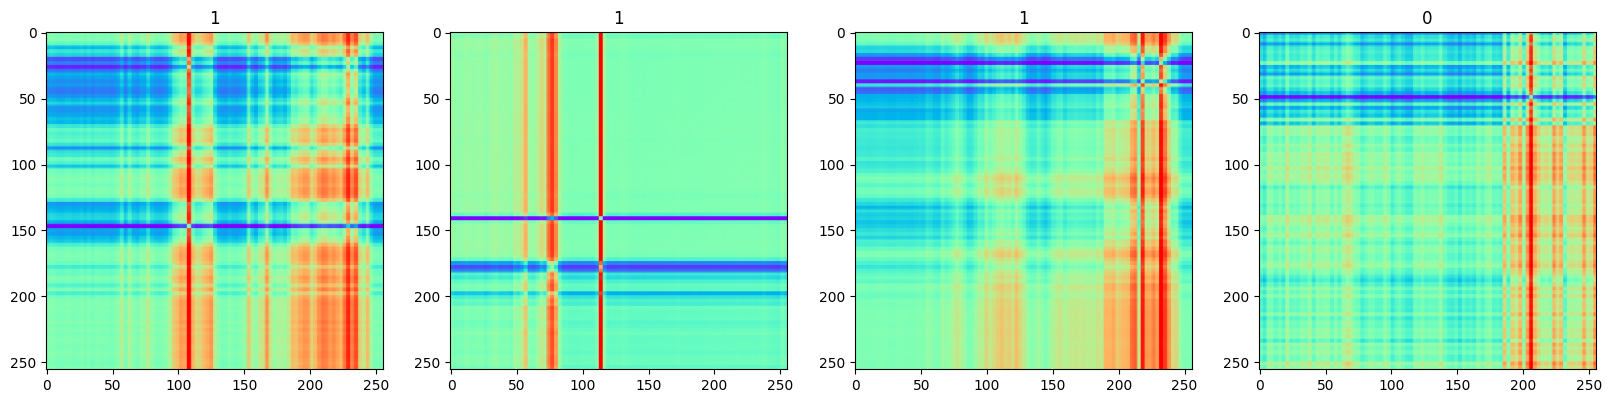

In [ ]:
#1是异常，0是正常
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#train data

In [ ]:
data = data.map(lambda x,y: (x, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[130.       , 254.       , 178.       ],
          [130.       , 254.       , 178.       ],
          [130.6211   , 254.       , 177.68945  ],
          ...,
          [ 28.       , 209.       , 226.       ],
          [128.       , 254.       , 179.       ],
          [128.       , 254.       , 179.       ]],
 
         [[130.       , 254.       , 178.       ],
          [130.       , 254.       , 178.       ],
          [130.6211   , 254.       , 177.68945  ],
          ...,
          [ 28.       , 209.       , 226.       ],
          [128.       , 254.       , 179.       ],
          [128.       , 254.       , 179.       ]],
 
         [[230.       , 205.       , 115.       ],
          [230.       , 205.       , 115.       ],
          [230.41406  , 204.58594  , 114.68945  ],
          ...,
          [128.       , 254.       , 179.       ],
          [226.       , 209.       , 117.       ],
          [226.       , 209.       , 117.       ]],
 
         ...,
 
         [[1

In [ ]:
len(data)

27

In [ ]:
#split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size

18

In [ ]:
val_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      128       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      2112      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience=5,factor=0.3,min_lr = 0.00000000000000000000000000000001,verbose = 1)
early_stopping = EarlyStopping(monitor='val_loss',patience= 10,restore_best_weights=True,verbose=0)


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
18/18 [==============================] - 40s 2s/step - loss: 200.7395 - accuracy: 0.5538 - val_loss: 2.9308 - val_accuracy: 0.8125
Epoch 2/30
18/18 [==============================] - 1s 70ms/step - loss: 2.4335 - accuracy: 0.8646 - val_loss: 0.6972 - val_accuracy: 0.9531
Epoch 3/30
18/18 [==============================] - 1s 71ms/step - loss: 0.6498 - accuracy: 0.9045 - val_loss: 0.7620 - val_accuracy: 0.8854
Epoch 4/30
18/18 [==============================] - 1s 72ms/step - loss: 0.5418 - accuracy: 0.9097 - val_loss: 0.2807 - val_accuracy: 0.9531
Epoch 5/30
18/18 [==============================] - 1s 70ms/step - loss: 0.2300 - accuracy: 0.9288 - val_loss: 0.5269 - val_accuracy: 0.8177
Epoch 6/30
18/18 [==============================] - 1s 73ms/step - loss: 0.2157 - accuracy: 0.9288 - val_loss: 1.0993 - val_accuracy: 0.8333
Epoch 7/30
18/18 [==============================] - 1s 71ms/step - loss: 0.6235 - accuracy: 0.8819 - val_loss: 0.3054 - val_accuracy: 0.9740
Epoch 8/30
1

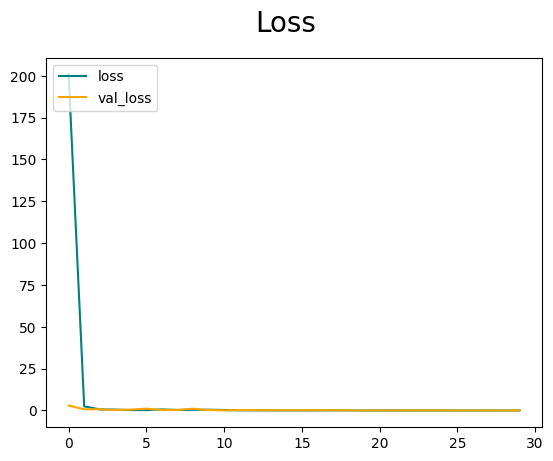

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

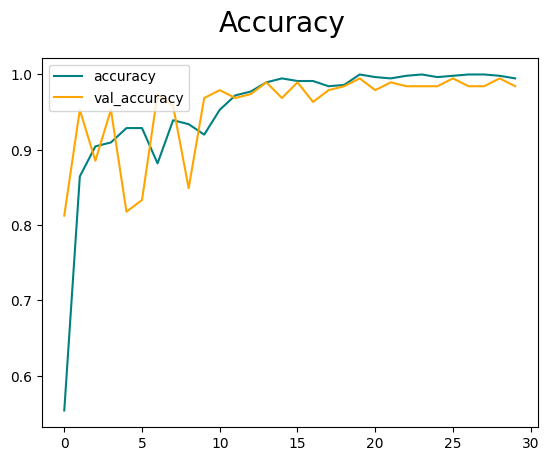

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#evaluate performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

3

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 105ms/step


In [ ]:
print(f'Precison:{pre.result().numpy():.3f}, Recall:{re.result().numpy():.3f},Accuracy:{acc.result().numpy():.3f}')

Precison:0.984, Recall:1.000,Accuracy:0.993


1/1 [==============================] - 0s 20ms/step


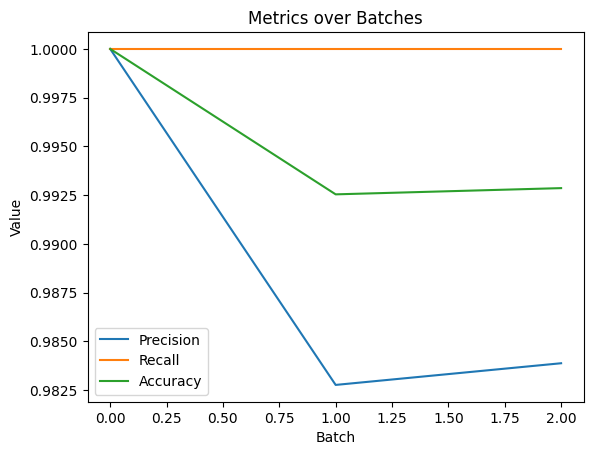

In [ ]:
import matplotlib.pyplot as plt

precisions = []
recalls = []
accuracies = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    precisions.append(pre.result().numpy())
    recalls.append(re.result().numpy())
    accuracies.append(acc.result().numpy())

plt.figure()
plt.plot(precisions, label='Precision')
plt.plot(recalls, label='Recall')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Batch')
plt.ylabel('Value')
plt.title('Metrics over Batches')
plt.legend()
plt.show()

Save Model


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','frauddetection.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
